In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3428317242e10c0022800e9d43ffc66825287c965251b50704dcddf02a57cc00
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
from qiskit.providers.fake_provider import GenericBackendV2

In [5]:
import pandas as pd

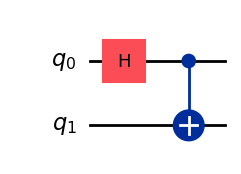

In [6]:
qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
qc_phi_plus.draw('mpl')

In [8]:
Statevector(qc_phi_plus).draw('latex')

<IPython.core.display.Latex object>

In [9]:
ga_phi_plus = qc_phi_plus.to_gate(label = '$\phi^+$')

In [11]:
ga_phi_plus

Instruction(name='circuit-171', num_qubits=2, num_clbits=0, params=[])

In [12]:
ga_phi_plus_controlled = ga_phi_plus.control(1, label = '$C\phi^+$')

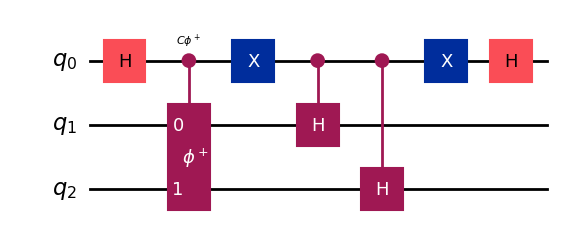

In [13]:
qc_tomo = QuantumCircuit(3)
qc_tomo.h(0)
qc_tomo.append(ga_phi_plus_controlled, [0,1,2])
qc_tomo.x(0)
qc_tomo.ch(0, 1)
qc_tomo.ch(0, 2)
qc_tomo.x(0)
qc_tomo.h(0)
qc_tomo.draw('mpl')


In [14]:
Statevector(qc_tomo)

Statevector([ 0.60355339-2.17871813e-17j, -0.10355339-2.22272341e-17j,
              0.25      +2.20072077e-17j,  0.25      +2.20072077e-17j,
              0.25      -2.20072077e-17j,  0.25      -2.20072077e-17j,
              0.60355339+2.17871813e-17j, -0.10355339+2.22272341e-17j],
            dims=(2, 2, 2))


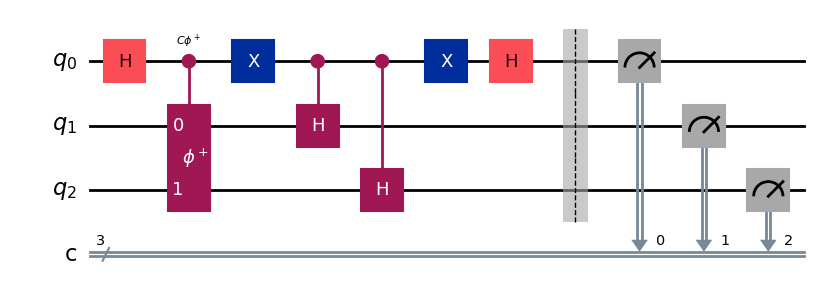

In [15]:
qc_tomo = QuantumCircuit(3, 3)
qc_tomo.h(0)
qc_tomo.append(ga_phi_plus_controlled, [0,1,2])
qc_tomo.x(0)
qc_tomo.ch(0, 1)
qc_tomo.ch(0, 2)
qc_tomo.x(0)
qc_tomo.h(0)
qc_tomo.barrier()
qc_tomo.measure([0, 1, 2], [0, 1, 2])
qc_tomo.draw('mpl')


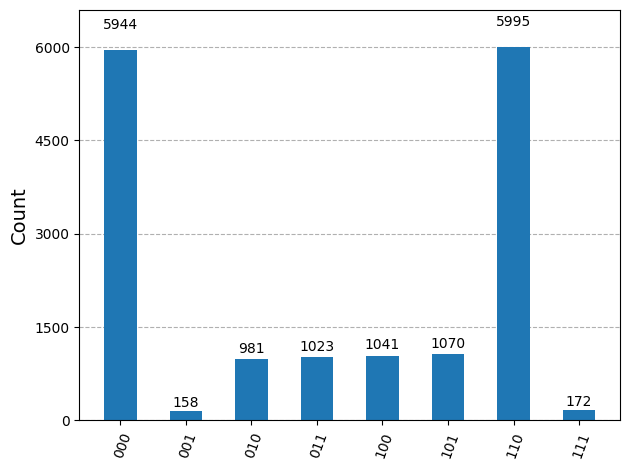

In [64]:
shots = 16 * 1024
backend = AerSimulator()
qc_tomo_trans = transpile(qc_tomo, backend)
job = backend.run(qc_tomo_trans, shots = shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [65]:
p000=counts['000']/shots
p001=counts['001']/shots
p010=counts['010']/shots
p011=counts['011']/shots
p100=counts['100']/shots
p101=counts['101']/shots
p110=counts['110']/shots
p111=counts['111']/shots

In [66]:
alpha1=np.sqrt(2*(p000+p001-1/8))
phi1=np.arccos(2*(p000-p001)/alpha1)
alpha2=np.sqrt(2*(p010+p011-1/8))
phi2=np.arccos(2*(p010-p011)/alpha2)
alpha3=np.sqrt(2*(p100+p101-1/8))
phi3=np.arccos(2*(p100-p101)/alpha3)
alpha4=np.sqrt(2*(p110+p111-1/8))
phi4=np.arccos(2*(p110-p111)/alpha4)

/tmp/ipython-input-66-2600310002.py:2: RuntimeWarning: invalid value encountered in arccos
  phi1=np.arccos(2*(p000-p001)/alpha1)
/tmp/ipython-input-66-2600310002.py:3: RuntimeWarning: invalid value encountered in sqrt
  alpha2=np.sqrt(2*(p010+p011-1/8))
/tmp/ipython-input-66-2600310002.py:8: RuntimeWarning: invalid value encountered in arccos
  phi4=np.arccos(2*(p110-p111)/alpha4)


In [23]:
2*(p100+p101-1/8)

-0.0087890625

In [24]:
2*(p110-p111)/alpha4

np.float64(1.007676624739944)

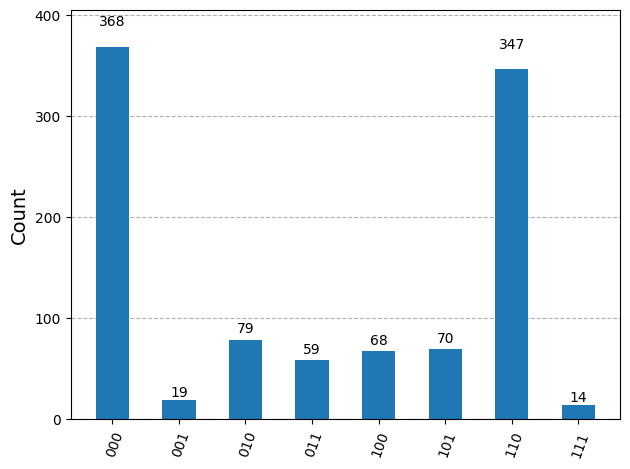

In [48]:
shots = 1024
backend = GenericBackendV2(3)
qc_tomo_trans = transpile(qc_tomo, backend)
job = backend.run(qc_tomo_trans, shots = shots)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [49]:
p000=counts['000']/shots
p001=counts['001']/shots
p010=counts['010']/shots
p011=counts['011']/shots
p100=counts['100']/shots
p101=counts['101']/shots
p110=counts['110']/shots
p111=counts['111']/shots

In [50]:
alpha1=np.sqrt(2*(p000+p001-1/8))
phi1=np.arccos(2*(p000-p001)/alpha1)
alpha2=np.sqrt(2*(p010+p011-1/8))
phi2=np.arccos(2*(p010-p011)/alpha2)
alpha3=np.sqrt(2*(p100+p101-1/8))
phi3=np.arccos(2*(p100-p101)/alpha3)
alpha4=np.sqrt(2*(p110+p111-1/8))
phi4=np.arccos(2*(p110-p111)/alpha4)

In [51]:
dic = {'alpha_theo': [1/np.sqrt(2), 0 ,0 , 1/np.sqrt(2)],'alpha_tomo': [alpha1, alpha2, alpha3, alpha4],
       'exp(i phi_the)': [1+0j, 'X', 'X', 1], 'exp(i phi_tomo)': [np.cos(phi1)+1j*np.sin(phi1), np.cos(phi2)+1j*np.sin(phi2),
                                                   np.cos(phi3)+1j*np.sin(phi3), np.cos(phi4)+1j*np.sin(phi4)]}
df = pd.DataFrame(dic)
df

,alpha_theo,alpha_tomo,exp(i phi_the),exp(i phi_tomo)
0,0.707107,0.711238,(1+0j),0.958386+0.285475j
1,0.000000,0.139754,X,0.279508+0.960143j
2,0.000000,0.139754,X,-0.027951+0.999609j
3,0.707107,0.674595,1,0.964120+0.265465j
